<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As13_Q2_KNN_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#import data
zoo = pd.read_csv("/content/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [ ]:
zoo.info()

In [ ]:
zoo.describe()

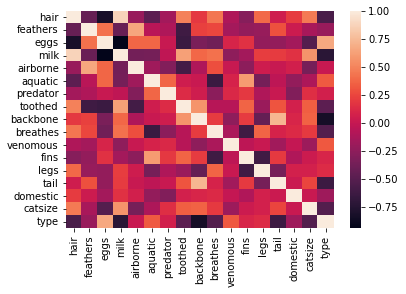

In [ ]:
#coreraltion matrix
import seaborn as sns
corr = zoo.corr()
sns.heatmap(corr)

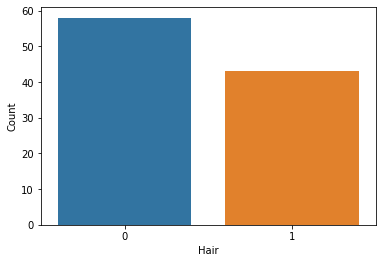

0    58
1    43
Name: hair, dtype: int64

In [ ]:
from matplotlib import pyplot as plt
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

## Model Building

In [ ]:
#Dividing the data into independent and dependent variable
#X = zoo.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values
X = zoo.drop(['animal name','hair','type'], axis=1)
y = zoo['type'].values

In [ ]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Fitting KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)


KNeighborsClassifier()

## Model prediction

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1])

In [ ]:
y_test

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1])

## Model Accuracy

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]])

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred,y_test)
accuracy_score*100

96.15384615384616

## Changed the classifier method to improve accuracy

In [ ]:
#Fitting KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred,y_test)
accuracy_score*100

84.61538461538461